<h1>Tutorial: Working with Time Series</h1><br>
https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [62]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf  
import seaborn; seaborn.set()
start_date = '2008-01-01'
end_date = '2018-06-08'

[*********************100%***********************]  1 of 1 downloaded


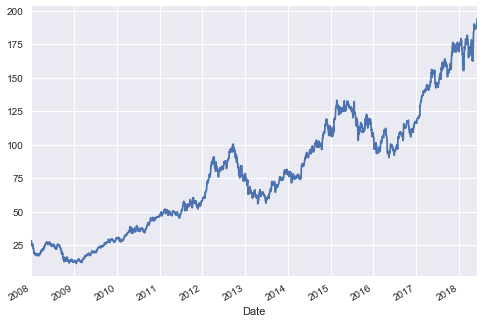

In [63]:
data = yf.download('AAPL',start_date,end_date)
data.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


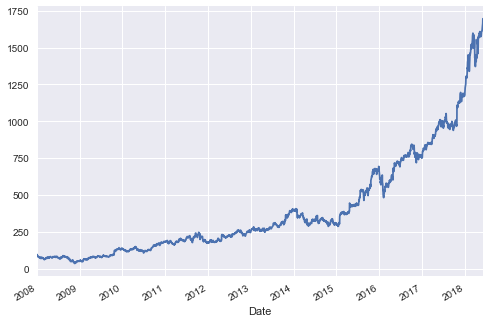

In [65]:
data = yf.download('AMZN',start_date,end_date)
data.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


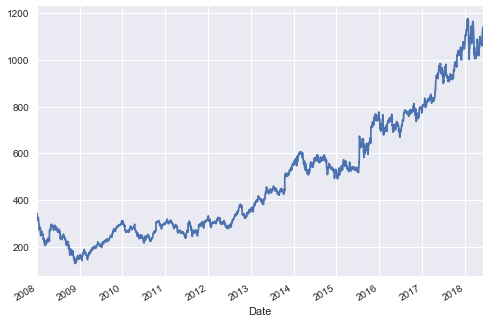

In [66]:
data = yf.download('GOOG',start_date,end_date)
data.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


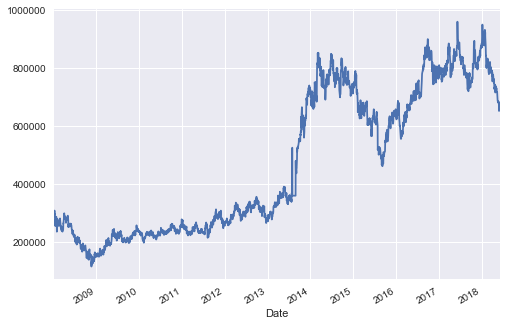

In [67]:
data = yf.download('035420.KS',start_date,end_date) # Naver

data.Close.plot()
plt.show()

[*********************100%***********************]  1 of 1 downloaded


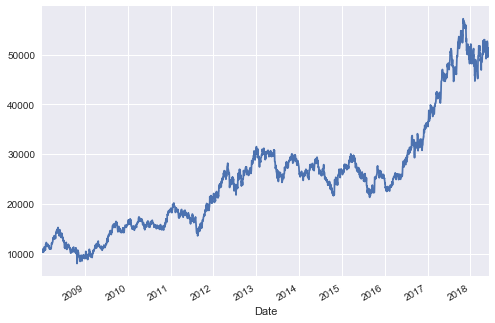

In [68]:
data = yf.download('005930.KS',start_date,end_date) # Samsung
data.Close.plot()
plt.show()

In [56]:
data.to_csv("../input/samsung_20180608.csv")

In [57]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,11180.0,11200.0,10840.0,10880.0,0.941429,18047200
2008-01-03,10760.0,11060.0,10640.0,10920.0,0.944891,19346500
2008-01-04,10920.0,10960.0,10760.0,10780.0,0.932777,17997350
2008-01-07,10360.0,10480.0,10340.0,10380.0,0.898165,39787200
2008-01-08,10380.0,10480.0,10320.0,10320.0,0.892974,24783700


In [58]:
ssng = data['Close']

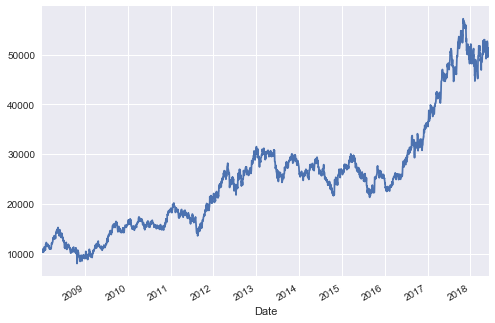

In [61]:
ssng.plot()

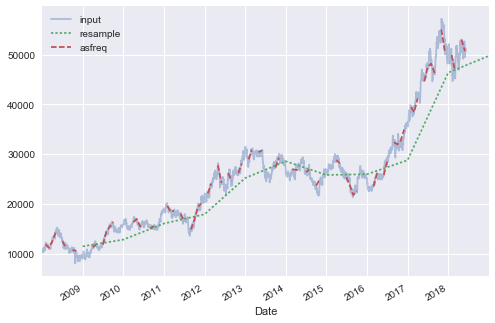

In [110]:
ssng.plot(alpha=0.4, style='-')
ssng.resample('A').mean().plot(style=':') # the average of the previous year
ssng.asfreq('M').plot(style='--') # value of the end of the month
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

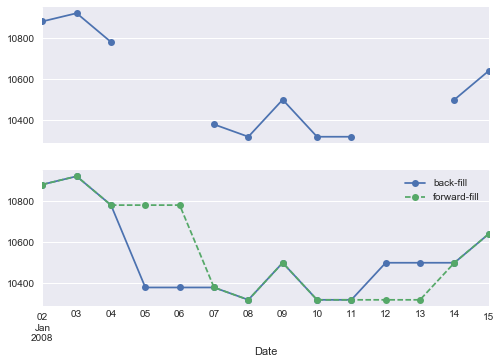

In [112]:
fig, ax = plt.subplots(2, sharex = True)
data = ssng.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill","forward-fill"])

<h2>Time Shifts</h2>

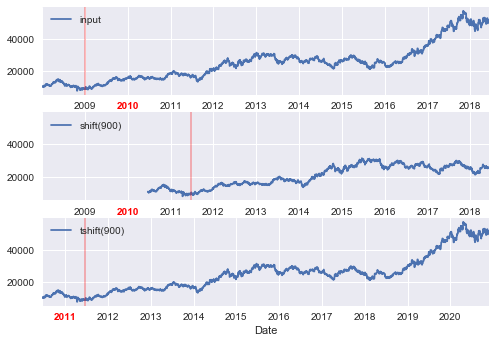

In [118]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
#print(ax[0])
ssng = ssng.asfreq('D', method='pad')
ssng.plot(ax=ax[0])
ssng.shift(900).plot(ax=ax[1]) # shift values by 900 on x
ssng.tshift(900).plot(ax=ax[2]) # shift indexe by 900 on x

local_max = pd.to_datetime('2009-1-1')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

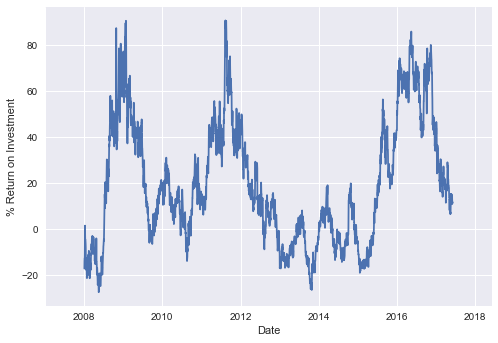

In [123]:
ROI = 100 * (ssng.tshift(-365) / ssng-1)
ROI.plot()
plt.ylabel('% Return on Investment')

<h2> Rolling windows

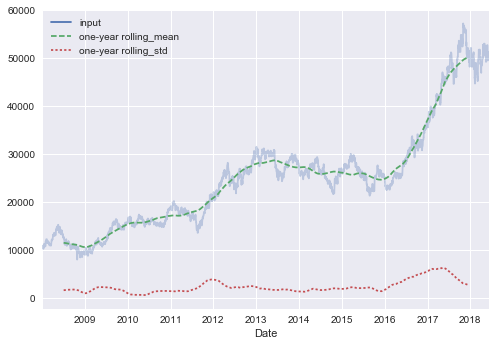

In [125]:
rolling = ssng.rolling(365, center=True)
data = pd.DataFrame({'input': ssng,
                    'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

<h2> Learn More</h2>
Time Series / Date functionality, http://pandas.pydata.org/pandas-docs/stable/timeseries.html
<br>
Python for Data Analysis, Data Wrangling with Pandas, NumPy, and IPython, http://shop.oreilly.com/product/0636920023784.do

    "B", "business day frequency"
    "C", "custom business day frequency (experimental)"
    "D", "calendar day frequency"
    "W", "weekly frequency"
    "M", "month end frequency"
    "BM", "business month end frequency"
    "MS", "month start frequency"
    "BMS", "business month start frequency"
    "Q", "quarter end frequency"
    "BQ", "business quarter endfrequency"
    "QS", "quarter start frequency"
    "BQS", "business quarter start frequency"
    "A", "year end frequency"
    "BA", "business year end frequency"
    "AS", "year start frequency"
    "BAS", "business year start frequency"
    "H", "hourly frequency"
    "T", "minutely frequency"
    "S", "secondly frequency"
    "L", "milliseonds"
    "U", "microseconds"

In [127]:
data = pd.read_csv("../input/FremontBridge.csv", index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [128]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [129]:
data.dropna().describe()

,West,East,Total
count,49600.000000,49600.000000,49600.000000
mean,54.716230,55.895887,110.612117
std,73.001037,81.137001,140.092804
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [130]:
#matplotlib inline
import seaborn;seaborn.set()

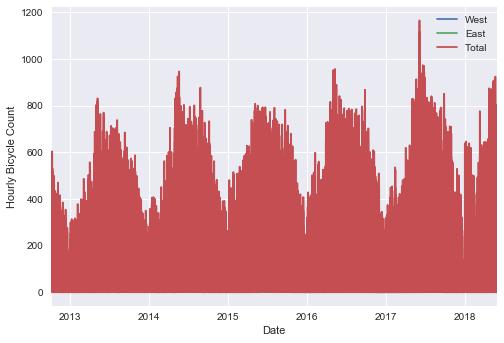

In [131]:
data.plot()
plt.ylabel('Hourly Bicycle Count')

In [133]:
weekly = data.resample('W').sum()
weekly.head()

,West,East,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0


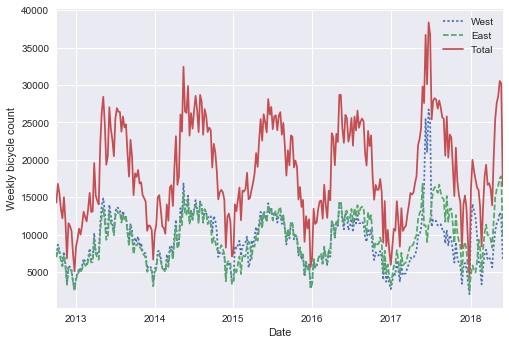

In [134]:
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count')

In [135]:
daily = data.resample('D').sum()

In [136]:
daily.head()

,West,East,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0


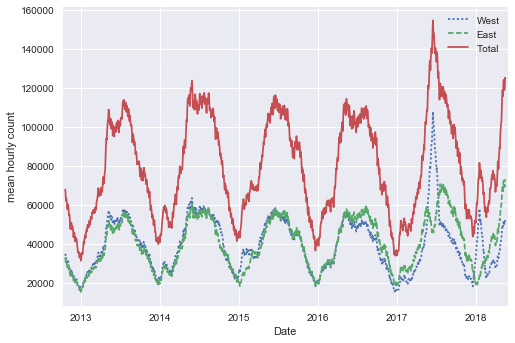

In [139]:
daily.rolling(30, center=True).sum().plot(style=[':','--', '-'])
plt.ylabel('mean hourly count')

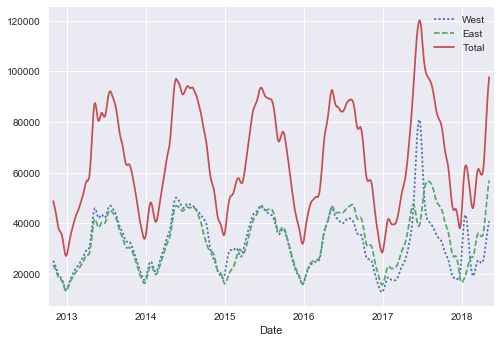

In [140]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

                West        East       Total
00:00:00    5.383648    6.711176   12.094823
01:00:00    2.971456    3.378810    6.350266
02:00:00    2.142026    2.112942    4.254968
03:00:00    1.623125    1.378810    3.001935
04:00:00    3.552975    2.808418    6.361393
05:00:00   16.866473    9.248186   26.114659
06:00:00   58.761006   32.830672   91.591679
07:00:00  153.799710   73.911950  227.711659
08:00:00  205.777455  112.550073  318.327528
09:00:00  111.324298   75.860600  187.184898
10:00:00   54.978219   42.477251   97.455470
11:00:00   46.678606   38.004356   84.682962
12:00:00   48.399806   41.642788   90.042594
13:00:00   50.790518   45.628447   96.418965
14:00:00   53.036284   51.731495  104.767779
15:00:00   62.581519   69.981132  132.562651
16:00:00   86.521045  131.290760  217.811805
17:00:00  121.639090  256.582970  378.222061
18:00:00   96.675375  167.574746  264.250121
19:00:00   52.416062   77.129173  129.545235
20:00:00   31.919690   42.684567   74.604257
21:00:00  

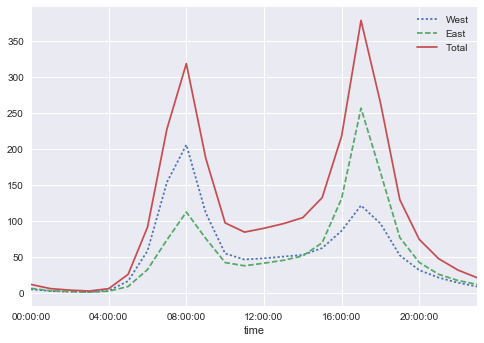

In [143]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
print(by_time)
by_time.plot(xticks=hourly_ticks, style=[':','--', '-'])

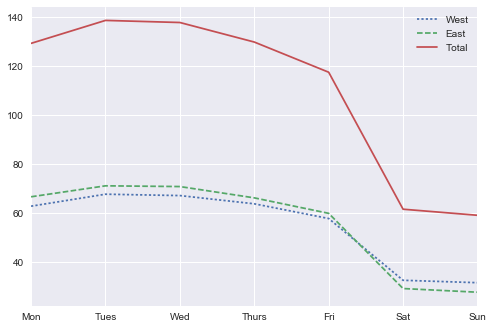

In [144]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-'])

In [150]:
by_time.columns.values

array(['West', 'East', 'Total'], dtype=object)

In [158]:
# 0,1,2,3,4 --> weekday # 5,6 --> weekend
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
# data.index.time() --> return time part. for this case, hour
# coumpute mean, grouping weekend and hour
by_time = data.groupby([weekend, data.index.time]).mean()

In [185]:
df_wk = pd.DataFrame(weekend, columns=['week'])
print(data.index.weekday[0:20])
print(data.index.time[1:10])
print(df_wk.week.value_counts())
print(by_time.head())


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[datetime.time(1, 0) datetime.time(2, 0) datetime.time(3, 0)
 datetime.time(4, 0) datetime.time(5, 0) datetime.time(6, 0)
 datetime.time(7, 0) datetime.time(8, 0) datetime.time(9, 0)]
Weekday    35448
Weekend    14160
Name: week, dtype: int64
                      West      East      Total
Weekday 00:00:00  4.664861  5.632363  10.297224
        01:00:00  2.415708  2.636425   5.052133
        02:00:00  1.765741  1.635748   3.401490
        03:00:00  1.486798  1.253216   2.740014
        04:00:00  4.258632  3.098172   7.356804


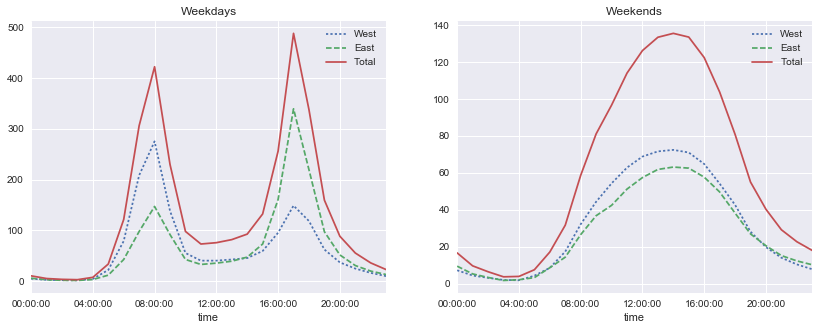

In [159]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(14,5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                          xticks=hourly_ticks,style=[':','--','-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=[':','--','-'])


Ref:<br>
[1] Summarising, Aggregating, and Grouping data in Python Pandas, https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/ <br>
[2] Pandas reindex datetimeindex keeping existing values, 
https://stackoverflow.com/questions/48378107/pandas-reindex-datetimeindex-keeping-existing-values <br>
[3] Using Python, what's the best way to get stock data?, https://www.quora.com/Using-Python-whats-the-best-way-to-get-stock-data <br> 
[4] Time Series / Date functionality, https://raw.githubusercontent.com/timmie/pandas/9b0932368d6cf608f9e39d14a9532754f672d410/doc/source/timeseries.rst
